In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'brazilian-ecommerce:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F55151%2F2669146%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240527%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240527T200049Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5a8965e5985356e29e07c5882bc09d33752cb860c9e0511d57dc8cf289837d1a4fc2f4ce47f69e3b012bbb9e17ad6ba0ad93ff828e5ac64b6e3ba094489a34bfe419938ba364d99bb53aeda91a1def79504add371b4bd2ad599e82b3b684b077f0f17a3ddd12b49b657f8c538bd93844365082242381014f645647a4a2534157e1d9ffd09520f7549f06ee97471ff28d51e3feb4489c0ac2d94ee3e9b9461bd5aaf1cfa40f029c86a7c3b6c95b1dceb869f4423595473dfd960dd88364e95272a6e2ca4aa4d65568ce064f61a3370f750500183f04e0b490782a02054fd5869ba3aec1cb0171371c81f2264476aef80f5986e629b9ab1ae5ccf9d7f0f4ea056c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 44717580 bytes downloaded
Downloaded and uncompressed: brazilian-ecommerce
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv
/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv
/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv


In [4]:
# manipulação de bases de dados
import pandas as pd

# manipulação algébrica
import numpy as np

# Bibliotecas de EDA
import missingno
from summarytools import dfSummary
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Função para lidar com latitudes e longitudes
from geopy.distance import geodesic

# Trazendo a função para dividir em treino e teste e a função para construir a validação cruzada
from sklearn.model_selection import train_test_split, KFold

# Importando a função de feature importance
from sklearn.inspection import permutation_importance

# Importando os modelos que serão utilizados
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Importando os imputers e o pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Importando a função para tratar variáveis categóricas
from category_encoders import CatBoostEncoder

# Biblioteca para calcular as métricas de regressão
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Biblioteca para tunagem de hiperparâmetros
import optuna as opt

pd.set_option('display.max_columns', None)

from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
df_orders = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
df_orders_Itens = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
df_products = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')
df_costumers = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')
df_reviews = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv')
df_pagamentos = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv')
df_vendedores = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv')
df_geoloc = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv')

# Analise de cada dataset separadamente

## Df Orders

In [6]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


## Df Orders Itens

In [7]:
df_orders_Itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


## Df Products

In [8]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


## Df costumers

In [9]:
df_costumers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


## Df reviews

In [10]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


## Df pagamentos

In [11]:
df_pagamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


## Df vendedores

In [12]:
df_vendedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


## Df Geolocalização

In [13]:
df_geoloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


# Unindo as bases de dados

In [14]:
df1 = pd.merge(df_orders, df_orders_Itens, on='order_id')

df2 = pd.merge(df1, df_products, on='product_id')

df3 = pd.merge(df2, df_costumers, on='customer_id')

df4 = pd.merge(df3, df_reviews, on='order_id')

df5 = pd.merge(df4, df_pagamentos, on='order_id')

df = pd.merge(df5, df_vendedores, on='seller_id')

In [15]:
print(f"A base possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

A base possui 117329 linhas e 39 colunas.


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  object 
 12  price                         

In [17]:
df.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,117329.000000,117329.000000,117329.000000,115634.000000,115634.000000,115634.000000,117309.000000,117309.000000,117309.000000,117309.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000
mean,1.194121,120.524349,20.027514,48.768018,785.802861,2.205528,2110.763062,30.254456,16.612476,23.071452,35060.118112,4.031467,1.094452,2.940151,172.062565,24450.781955
std,0.684225,182.944843,15.828077,10.033831,652.382965,1.717783,3785.128931,16.177519,13.452625,11.745875,29849.496175,1.387927,0.731174,2.775370,265.388194,27582.364358
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1.000000,1.000000,0.000000,0.000000,1001.000000
25%,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11250.000000,4.000000,1.000000,1.000000,60.750000,6429.000000
50%,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24240.000000,5.000000,1.000000,2.000000,108.100000,13660.000000
75%,1.000000,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,58770.000000,5.000000,1.000000,4.000000,189.060000,28035.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99990.000000,5.000000,29.000000,24.000000,13664.080000,99730.000000


Vamos analisar os nulos nesse nosso conjunto de dados unido

In [18]:
val_nulos = df.isnull().sum()
val_nulos_data_frame = pd.DataFrame({'Nome da Coluna':val_nulos.index,'Quantidade de valores nulos':val_nulos.values})
val_nulos_data_frame

,Nome da Coluna,Quantidade de valores nulos
0,order_id,0
1,customer_id,0
2,order_status,0
3,order_purchase_timestamp,0
4,order_approved_at,15
5,order_delivered_carrier_date,1235
6,order_delivered_customer_date,2471
7,order_estimated_delivery_date,0
8,order_item_id,0
9,product_id,0


In [19]:
# Percentual de valores nulos

rows, columns = df.shape

percentual_nan = ((df.isnull().sum()/rows)*100).round(2)
percentual_nan

order_id                          0.00
customer_id                       0.00
order_status                      0.00
order_purchase_timestamp          0.00
order_approved_at                 0.01
order_delivered_carrier_date      1.05
order_delivered_customer_date     2.11
order_estimated_delivery_date     0.00
order_item_id                     0.00
product_id                        0.00
seller_id                         0.00
shipping_limit_date               0.00
price                             0.00
freight_value                     0.00
product_category_name             1.44
product_name_lenght               1.44
product_description_lenght        1.44
product_photos_qty                1.44
product_weight_g                  0.02
product_length_cm                 0.02
product_height_cm                 0.02
product_width_cm                  0.02
customer_unique_id                0.00
customer_zip_code_prefix          0.00
customer_city                     0.00
customer_state           

Analisaremos os valores distintos

In [20]:
# Contagem de valores distintos

contagem = pd.DataFrame(columns = ['Variavel', 'Quantidade_valores_distintos'])

for colunas in df.columns:
    dados = pd.DataFrame({'Variavel':[colunas], 'Quantidade_valores_distintos':df[colunas].value_counts().shape[0]})
    contagem = pd.concat([contagem, dados], ignore_index=True)

contagem

,Variavel,Quantidade_valores_distintos
0,order_id,97916
1,customer_id,97916
2,order_status,7
3,order_purchase_timestamp,97370
4,order_approved_at,89533
5,order_delivered_carrier_date,80449
6,order_delivered_customer_date,95021
7,order_estimated_delivery_date,449
8,order_item_id,21
9,product_id,32789


**dfSummary(df)**

É uma função do pacote *summarytools*, que fornece uma descrição detalhada e intuitiva de um dataframe. Esta função é muito útil para a análise exploratória de dados (EDA) porque fornece um resumo abrangente de cada variável no dataframe, incluindo estatísticas descritivas, distribuição, presença de valores ausentes, entre outros aspectos importantes.

O que é dfSummary(df)?

dfSummary(df) gera um resumo estatístico detalhado para cada variável em um dataframe df. A saída da função inclui informações como:

Tipo de variável (numérica, categórica, etc.)
Estatísticas descritivas (média, mediana, mínimo, máximo, quartis)
Distribuição de valores (histograma para variáveis numéricas, contagens de frequências para variáveis categóricas)
Contagem e proporção de valores ausentes (NAs)
Contagem de valores distintos (unique)
Exemplos de valores (valores principais para categóricas ou principais para numéricas)


Por que usar dfSummary(df)?

Usar dfSummary(df) tem várias vantagens:

Análise Exploratório de Dados (EDA):

*   Ajuda a entender a distribuição e a natureza dos dados em cada coluna.
Fornece uma visão geral rápida dos dados sem a necessidade de gerar estatísticas descritivas individualmente para cada variável.
Identificação de Problemas nos Dados:

*   Detecta valores ausentes (NAs), valores fora do intervalo esperado e outliers.
*   Identifica variáveis que precisam de limpeza ou transformação antes de análise mais aprofundada.
Eficiência:

*   Economiza tempo ao gerar um resumo detalhado de todas as variáveis em um único comando.
*   Facilita a documentação e a comunicação dos insights iniciais sobre os dados.
Documentação e Comunicação:

*   A saída pode ser salva em arquivos HTML, facilitando o compartilhamento com outros membros da equipe ou para inclusão em relatórios.

Como usar dfSummary(df)?

Primeiro, é necessário instalar e carregar o pacote summarytools. Depois, basta aplicar a função dfSummary ao dataframe que deseja analisar.

Exemplo de uso:



In [21]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,order_id[object],1. 895ab968e7bb0d5659d16cd74cd1652. fedcd9f7ccdc8cba3a18defedd1a553. fa65dad1b0e818e3ccc5cb0e3923134. ccf804e764ed5650cd8759557269dc5. c6492b842ac190db807c15aff21a7d6. 68986e4324f6a21481df4e6e89abcf7. a3725dfe487d359b5be08cac48b64e8. 465c2e1bee4561cb39e0db8c5993aa9. 6d58638e32674bebee793a47ac4cba10. 5a3b1c29a49756e75f1ef513383c0c11. other,"63 (0.1%)38 (0.0%)29 (0.0%)26 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)22 (0.0%)117,031 (99.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
2,customer_id[object],1. 270c23a11d024a44c896d1894b261a2. 13aa59158da63ba0e93ec6ac2c07aa3. 9af2372a1e49340278e7c1ef8d749f4. 92cd3ec6e2d643d4ebd0e3d6238f695. 6ee2f17e3b6c33d6a9557f280edd296. 86cc80fef09f7f39df4b0dbce48e817. d22f25a9fadfb1abbc2e29395b12398. 63b964e79dee32a3587651701a2b8d9. 2ba91e12e5e4c9f56b82b86d9031d310. be1c4e52bb71e0c54b11a26b8e8d5911. other,"63 (0.1%)38 (0.0%)29 (0.0%)26 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)22 (0.0%)117,031 (99.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
3,order_status[object],1. delivered2. shipped3. canceled4. invoiced5. processing6. unavailable7. approved,"114,859 (97.9%)1,167 (1.0%)553 (0.5%)370 (0.3%)370 (0.3%)7 (0.0%)3 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAChCAYAAADQgM1HAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9t

In [22]:
# Dataframe com a quantidade de pedidos para cada tipo de status do pedido

order_status_counts = df['order_status'].value_counts().reset_index()
order_status_counts.columns=['status_pedido','contagem']

order_status_counts

,status_pedido,contagem
0,delivered,114859
1,shipped,1167
2,canceled,553
3,invoiced,370
4,processing,370
5,unavailable,7
6,approved,3


In [23]:
payment_counts = df['payment_type'].value_counts().reset_index()
payment_counts.columns=['Tipo_pagamento', 'contagem']

payment_counts

,Tipo_pagamento,contagem
0,credit_card,86520
1,boleto,22835
2,voucher,6282
3,debit_card,1692


In [24]:
fig = px.bar(payment_counts, x='Tipo_pagamento', y='contagem', color='Tipo_pagamento', text='contagem',
            title='Pedidos por tipo de pagamento', labels={'contagem':'Quantidade de Pedidos', 'Tipo_pagamento':'Tipo de Pagamento'})

fig.update_traces(textposition='outside', texttemplate='%{text}', textfont_size=12)
fig.update_layout(width=1000, height=500)
fig.show()

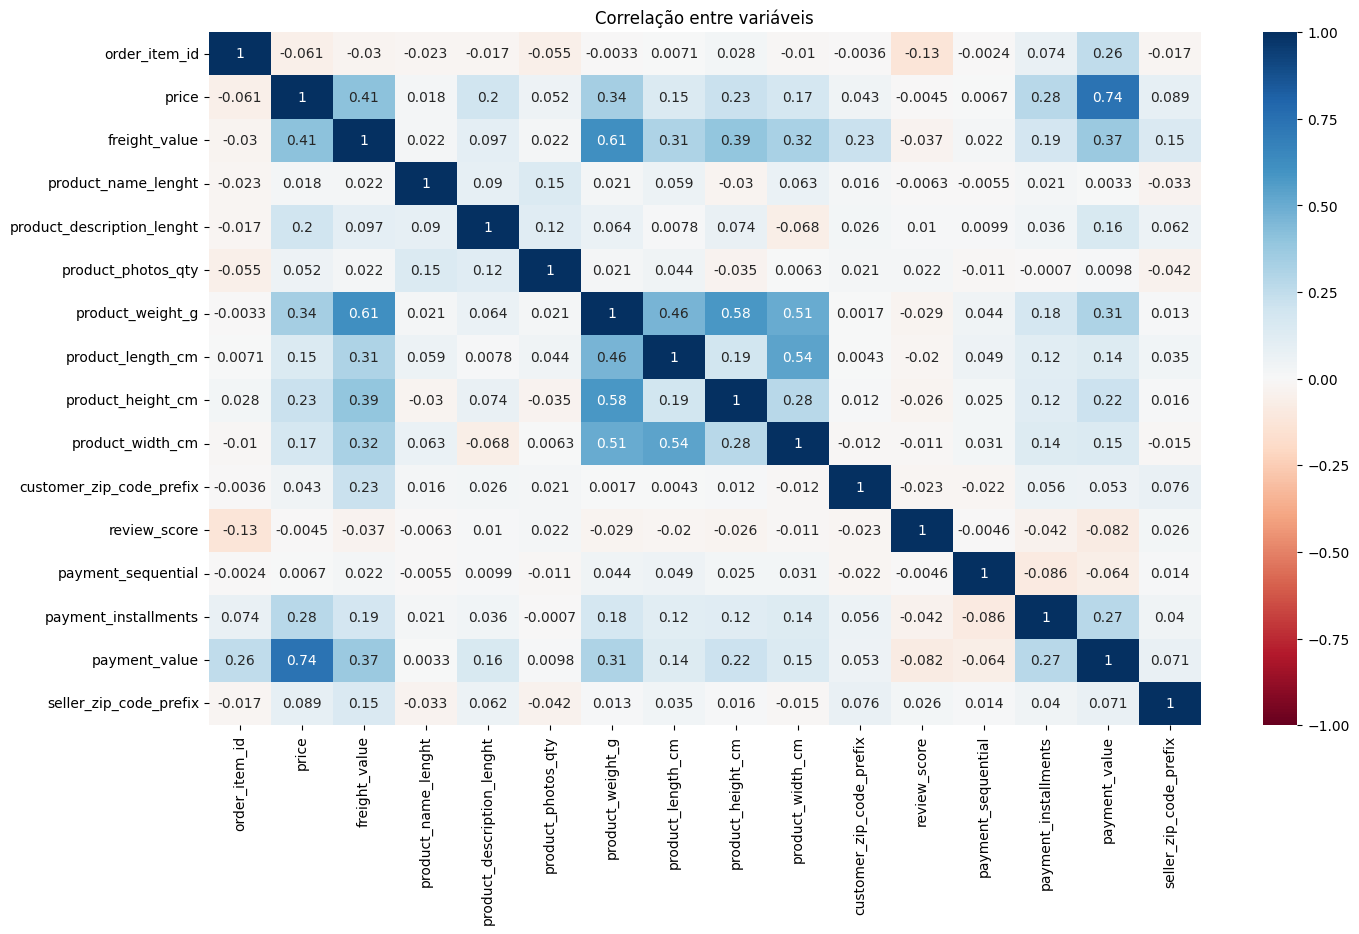

In [25]:
# Heatmap mostrando as correlações entre variáveis numéricas

plt.figure(figsize=(16,9))
plt.title('Correlação entre variáveis')

df_numeric = df.select_dtypes(include=[np.number])
sns.heatmap(df_numeric.corr(), annot=True, vmin=-1, vmax=1, cmap='RdBu')
plt.show()

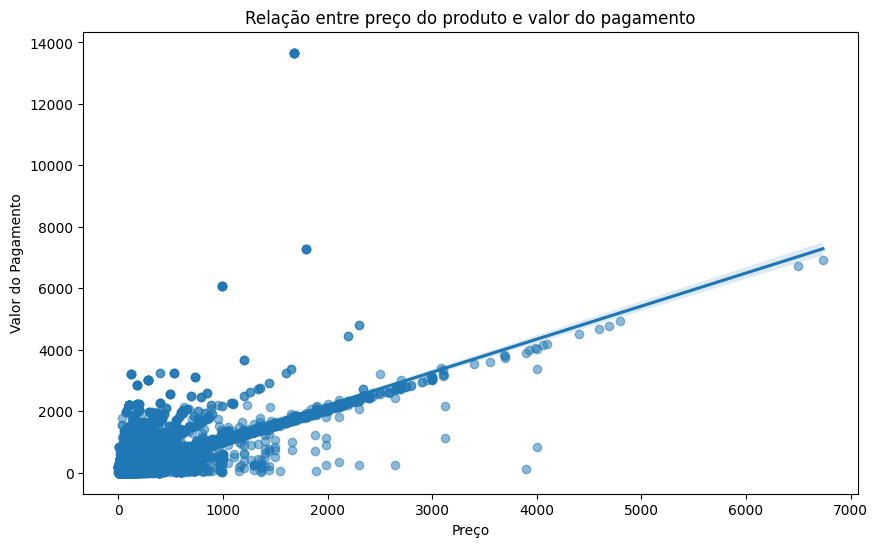

In [26]:
# Gráfico de dispersão entre preço do produto e valor pago pelo cliente

plt.figure(figsize=(10,6))
sns.regplot(x='price', y='payment_value', data=df, scatter_kws={'alpha':0.5})

plt.title('Relação entre preço do produto e valor do pagamento')
plt.xlabel('Preço')
plt.ylabel('Valor do Pagamento')
plt.show()

([0], [Text(0, 0, '')])

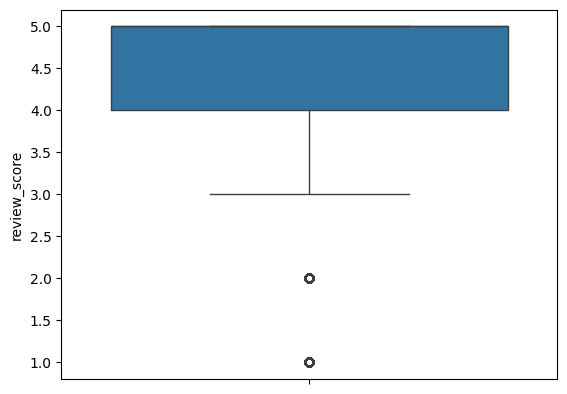

In [27]:
# Análise univariada dos reviews dos clientes

fig=sns.boxplot(y='review_score', data=df)
plt.xticks(rotation=90)

In [28]:
df['review_score'].describe()

count    117329.000000
mean          4.031467
std           1.387927
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_score, dtype: float64

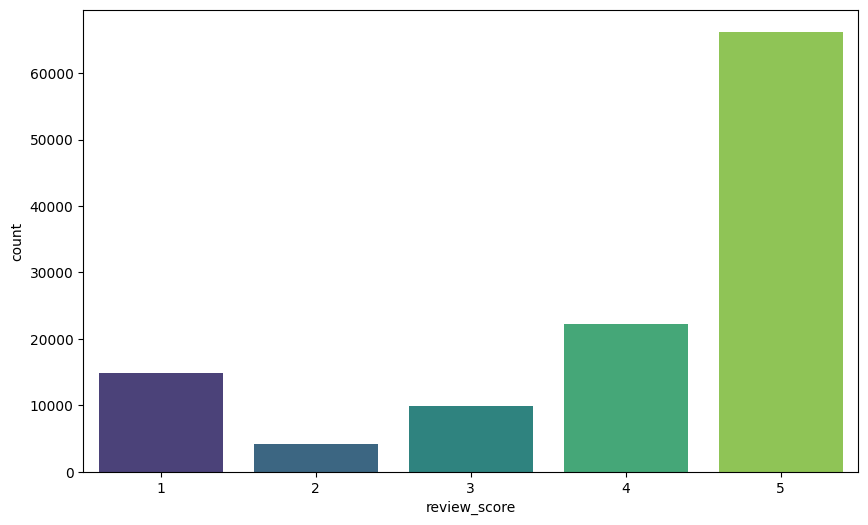

In [29]:
# Countplot da quantidade de pedidos para cada uma das notas de review

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='review_score', palette='viridis')
plt.show()

In [30]:
df['price'].describe()

count    117329.000000
mean        120.524349
std         182.944843
min           0.850000
25%          39.900000
50%          74.900000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

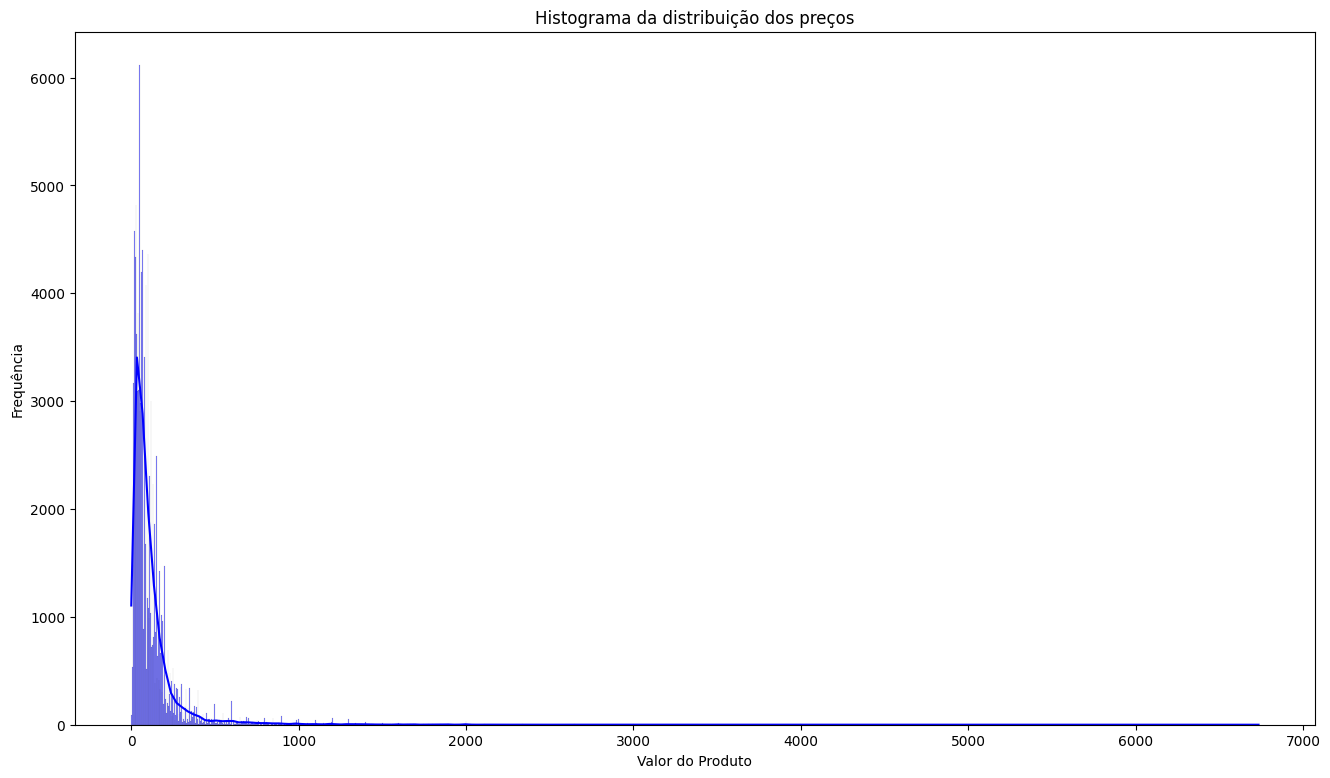

In [31]:
# Histograma da distribuição dos preços dos produtos

plt.figure(figsize=(16,9))
sns.histplot(x='price', data=df, color='blue', kde=True)
plt.title('Histograma da distribuição dos preços')
plt.xlabel('Valor do Produto')
plt.ylabel('Frequência')
plt.show()

([0], [Text(0, 0, '')])

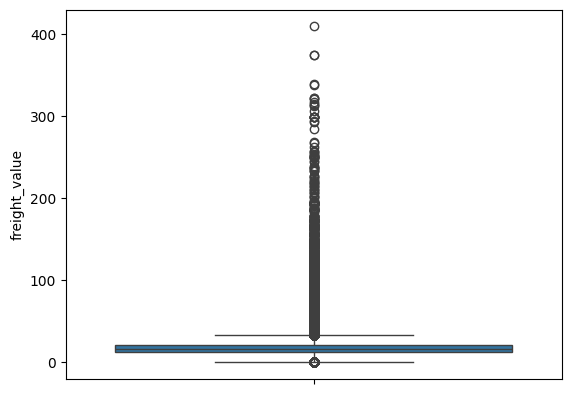

In [32]:
# Análise univariada do valor do frete

fig=sns.boxplot(y='freight_value', data=df)
plt.xticks(rotation=90)

In [33]:
df['freight_value'].describe()

count    117329.000000
mean         20.027514
std          15.828077
min           0.000000
25%          13.080000
50%          16.280000
75%          21.180000
max         409.680000
Name: freight_value, dtype: float64

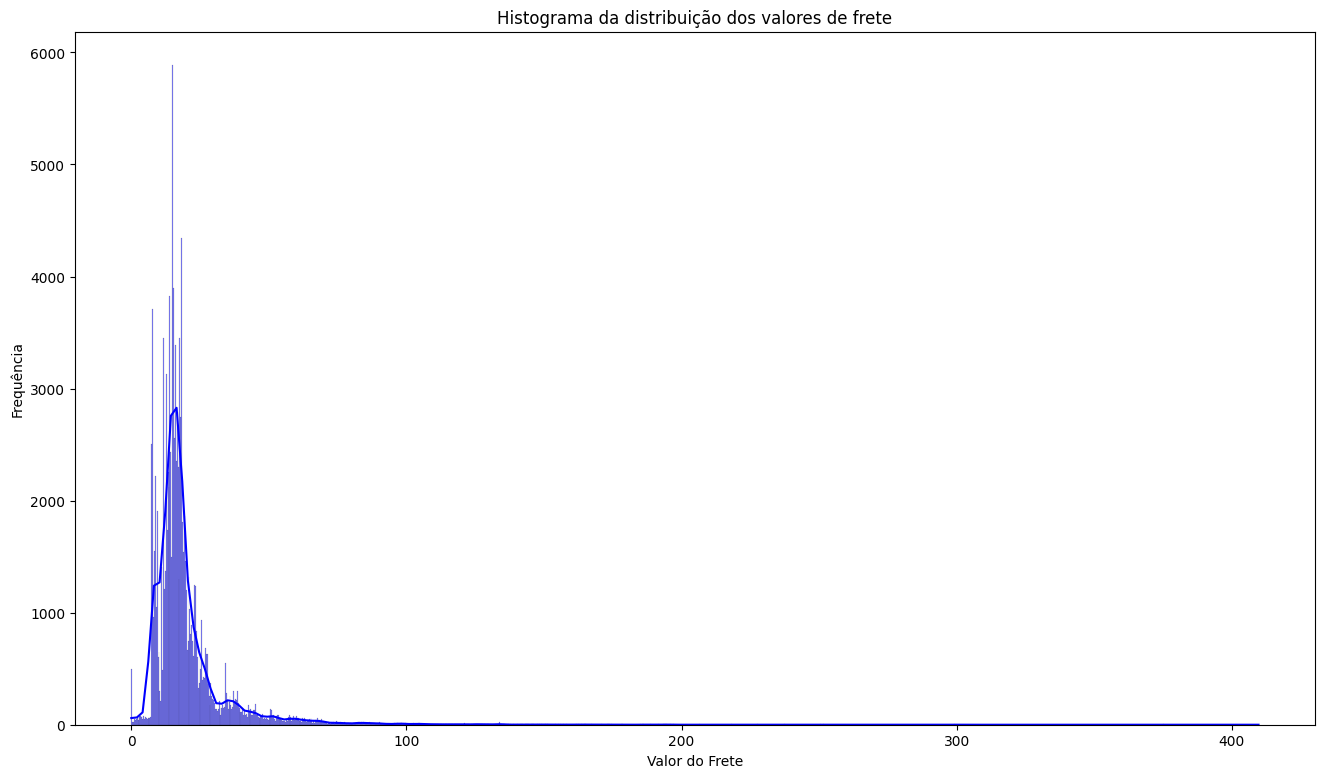

In [34]:
# Histograma da distribuição de valores de frete

plt.figure(figsize=(16,9))
sns.histplot(x='freight_value', data=df, color='blue', kde=True)
plt.title('Histograma da distribuição dos valores de frete')
plt.xlabel('Valor do Frete')
plt.ylabel('Frequência')
plt.show()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'delivered'),
  Text(1, 0, 'shipped'),
  Text(2, 0, 'canceled'),
  Text(3, 0, 'invoiced'),
  Text(4, 0, 'processing'),
  Text(5, 0, 'unavailable'),
  Text(6, 0, 'approved')])

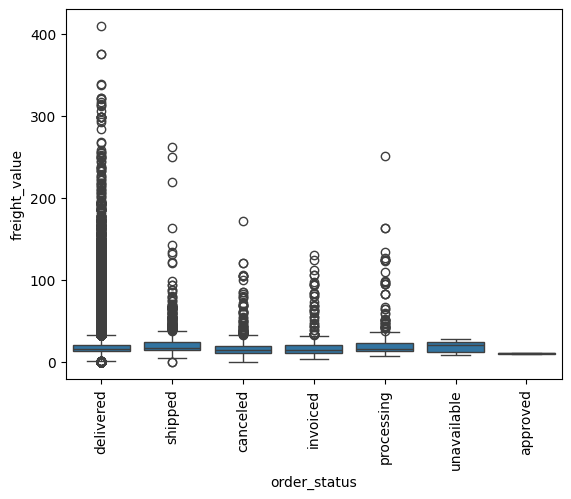

In [35]:
fig=sns.boxplot(x = 'order_status',y='freight_value', data=df)
plt.xticks(rotation=90)

In [36]:
# Criando variavel do volume
df['Volume'] = df['product_length_cm']*df['product_height_cm']*df['product_width_cm']
# Criando a variavel da densidade
df['densidade'] = df['product_weight_g']/df['Volume']

In [37]:
# Criando coluna velocidade de entrega

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

df['Velocidade_entrega_real'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
df['Velocidade_entrega_estimada'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days

In [38]:
# Criação da velocidade de aprovação do pedido
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])

df['velocidade_processamento'] = (df['order_approved_at'] - df['order_purchase_timestamp']).dt.days

In [39]:
df_geoloc.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [40]:
geolocation_agregado = df_geoloc.groupby('geolocation_zip_code_prefix').agg({'geolocation_lat':'mean','geolocation_lng':'mean'}).reset_index()
geolocation_agregado.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733


In [41]:
# Trazendo latitude e longitude dos vendedores
df=pd.merge(df, geolocation_agregado, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,Volume,densidade,Velocidade_entrega_real,Velocidade_entrega_estimada,velocidade_processamento,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,9350,-23.680729,-46.444238
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,9350,-23.680729,-46.444238
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,9350,-23.680729,-46.444238
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,1,credit_card,3,37.77,9350,maua,SP,1976.0,0.253036,2.0,12,0.0,9350,-23.680729,-46.444238
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,1,credit_card,1,37.77,9350,maua,SP,1976.0,0.253036,5.0,12,0.0,9350,-23.680729,-46.444238


In [42]:
# Renomeando e excluindo colunas desnecessárias
df.rename(columns={'geolocation_lat':'seller_lat', 'geolocation_lng':'seller_lng'}, inplace=True)
df.drop(columns='geolocation_zip_code_prefix', inplace=True)

In [43]:
# Trazendo latitude e longitude dos compradores
df=pd.merge(df, geolocation_agregado, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,Volume,densidade,Velocidade_entrega_real,Velocidade_entrega_estimada,velocidade_processamento,seller_lat,seller_lng,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,-23.680729,-46.444238,3149,-23.576983,-46.587161
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,-23.680729,-46.444238,3149,-23.576983,-46.587161
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,-23.680729,-46.444238,3149,-23.576983,-46.587161
3,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,1,6cc44821f36f3156c782da72dd634e47,da8622b14eb17ae2831f4ac5b9dab84a,2018-03-28 18:05:36,99.90,11.79,cama_mesa_banho,55.0,273.0,1.0,1050.0,38.0,10.0,38.0,8a4002923e801e3120a11070fd31c9e2,3149,sao paulo,SP,3cd186b6013f4145b9bd406847b61f19,5,NaN,Nâo sabia da entrega aos domingos pelo correio...,2018-03-26 00:00:00,2018-03-27 02:21:27,1,credit_card,2,223.38,13405,piracicaba,SP,14440.0,0.072715,2.0,12,0.0,-22.708702,-47.664701,3149,-23.576983,-46.587161
4,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,2,6cc44821f36f3156c782da72dd634e47,da8622b14eb17ae2831f4ac5b9dab84a,2018-03-28 18:05:36,99.90,11.79,cama_mesa_banho,55.0,273.0,1.0,1050.0,38.0,10.0,38.0,8a4002923e801e3120a11070fd31c9e2,3149,sao paulo,SP,3cd186b6013f4145b9bd406847b61f19,5,NaN,Nâo sabia da entrega aos domingos pelo correio...,2018-03-26 00:00:00,2018-03-27 02:21:27,1,credit_card,2,223.38,13405,piracicaba,SP,14440.0,0.072715,2.0,12,0.0,-22.708702,-47.664701,3149,-23.576983,-46.587161


In [44]:
# Renomeando e excluindo colunas desnecessárias
df.rename(columns={'geolocation_lat':'customer_lat', 'geolocation_lng':'customer_lng'}, inplace=True)
df.drop(columns='geolocation_zip_code_prefix', inplace=True)

In [45]:
# Calculando a distância entre vendedor e comprador

def calcular_distancia(dataframe):
    seller_coordenadas = (dataframe['seller_lat'], dataframe['seller_lng'])
    customer_coordenadas = (dataframe['customer_lat'], dataframe['customer_lng'])

    return geodesic(seller_coordenadas, customer_coordenadas).kilometers

df['distancia'] = df.apply(calcular_distancia, axis=1)

In [46]:
df.drop(columns=['seller_lat','seller_lng','customer_lat','customer_lng'], inplace=True)

In [47]:
# Obtendo mês de compra e dia da semana da compra
df['mes_compra'] = df['order_purchase_timestamp'].dt.month

df['dia_semana_compra'] = df['order_purchase_timestamp'].dt.dayofweek

In [48]:
# Trazendo informação da época do ano

df['black_friday'] = ((df['mes_compra'] == 11) & (df['dia_semana_compra'] == 4) & (df['order_purchase_timestamp'].dt.day >= 20) & (df['order_purchase_timestamp'].dt.day <= 30)).astype(int)
df['natal'] = ((df['mes_compra'] == 12) & (df['order_purchase_timestamp'].dt.day >= 1) & (df['order_purchase_timestamp'].dt.day <= 25)).astype(int)

In [49]:
# Removendo as colunas desnecessárias
colunas_para_remover = ['order_id', 'customer_id', 'product_id', 'seller_id', 'order_status', 'order_purchase_timestamp',
                       'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                       'order_estimated_delivery_date', 'shipping_limit_date', 'product_description_lenght',
                       'product_name_lenght', 'product_photos_qty', 'customer_unique_id', 'review_id', 'review_comment_title',
                       'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
                       'payment_type', 'payment_installments', 'payment_value', 'seller_zip_code_prefix', 'order_item_id']

df.drop(columns=colunas_para_remover, inplace=True)
df.drop(columns='customer_zip_code_prefix', inplace=True)

In [50]:
df[df.duplicated()]

,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_city,customer_state,review_score,seller_city,seller_state,Volume,densidade,Velocidade_entrega_real,Velocidade_entrega_estimada,velocidade_processamento,distancia,mes_compra,dia_semana_compra,black_friday,natal
1,29.99,8.72,utilidades_domesticas,500.0,19.0,8.0,13.0,sao paulo,SP,4,maua,SP,1976.0,0.253036,8.0,15,0.0,18.566632,10,0,0,0
2,29.99,8.72,utilidades_domesticas,500.0,19.0,8.0,13.0,sao paulo,SP,4,maua,SP,1976.0,0.253036,8.0,15,0.0,18.566632,10,0,0,0
4,99.90,11.79,cama_mesa_banho,1050.0,38.0,10.0,38.0,sao paulo,SP,5,piracicaba,SP,14440.0,0.072715,2.0,12,0.0,146.370789,3,3,0,0
15,34.90,20.84,utilidades_domesticas,3700.0,32.0,22.0,46.0,florianopolis,SC,5,limeira,SP,32384.0,0.114254,8.0,27,0.0,556.788540,10,2,0,0
76,102.90,9.64,tablets_impressao_imagem,450.0,25.0,5.0,20.0,campinas,SP,5,santos,SP,2500.0,0.180000,8.0,10,0.0,136.727155,3,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116727,159.90,12.14,bebes,2200.0,16.0,35.0,49.0,itapecerica da serra,SP,5,maua,SP,27440.0,0.080175,4.0,9,0.0,41.916880,8,4,0,0
116740,960.00,82.51,moveis_escritorio,50.0,35.0,90.0,45.0,biguacu,SC,1,lajeado,RS,141750.0,0.000353,NaN,28,0.0,389.570993,2,1,0,0
116743,109.90,19.96,bebes,800.0,32.0,11.0,27.0,sao paulo,SP,5,camboriu,SC,9504.0,0.084175,8.0,26,0.0,436.557495,7,1,0,0
116744,109.90,19.96,bebes,800.0,32.0,11.0,27.0,sao paulo,SP,5,camboriu,SC,9504.0,0.084175,8.0,26,0.0,436.557495,7,1,0,0


In [51]:
df = df.drop_duplicates()

# Modelagem

In [52]:
# Dividindo em X e y
X = df.drop(columns='freight_value', axis=1)
y = df.freight_value

In [53]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

In [54]:
# Modelos instanciados

modelo_XGBoost = XGBRegressor(n_estimators = 1000, max_depth = 8, learning_rate = 1e-3, n_jobs = -1, random_state = 0)
modelo_LightGBM = LGBMRegressor(n_estimators = 1000, max_depth = 8, num_leaves = 2^8, learning_rate = 1e-3, n_jobs = -1, verbose = -1, random_state = 0)
modelo_catboost = CatBoostRegressor(n_estimators = 1000, max_depth = 8, learning_rate = 1e-3, random_state = 0, verbose = 0)
modelo_decision_tree = DecisionTreeRegressor(random_state = 0, max_depth = 8, min_samples_split = 2)

In [58]:
# Aplicando o Feature importance

# Instanciando o catboost encoder para variáveis categóricas

encoder = CatBoostEncoder()

X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

for col in X_train_encoded.select_dtypes(include=['object']).columns:

    # Tratando a variável categórica
    X_train_encoded[col] = encoder.fit_transform(X_train_encoded[col], y_train)
    X_test_encoded[col] = encoder.transform(X_test_encoded[col])

# Treinando o modelo
modelo_XGBoost.fit(X_train_encoded, y_train)

r = permutation_importance(modelo_XGBoost, X_test_encoded, y_test, n_repeats = 30, random_state = 0)



In [60]:
# Criando um dataframe para mostrar as importâncias de cada variável
importances = pd.DataFrame({'Feature':X_test_encoded.columns, 'importance':r.importances_mean})

# Ordenando as variáveis pela importância
importances = importances.sort_values(by='importance', ascending=False)
importances

,Feature,importance
11,Volume,2.186482e-01
16,distancia,2.016445e-01
2,product_weight_g,1.794451e-01
0,price,8.716159e-02
7,customer_state,2.794657e-02
9,seller_city,2.190611e-02
3,product_length_cm,1.578133e-02
5,product_width_cm,1.193465e-02
10,seller_state,1.174848e-02
12,densidade,8.866938e-03


In [61]:
# Definindo as colunas menos importantes com base no Feature Importance
colunas_menos_importantes = ['review_score', 'dia_semana_compra', 'natal', 'product_category_name', 'black_friday']

# Excluindo as colunas menos importantes
X_train = X_train.drop(columns = colunas_menos_importantes)
X_test = X_test.drop(columns = colunas_menos_importantes)

In [62]:
# Aplicando o Feature importance

# Instanciando o catboost encoder para variáveis categóricas
encoder = CatBoostEncoder()

X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

for col in X_train_encoded.select_dtypes(include=['object']).columns:

    # Tratando a variável categórica
    X_train_encoded[col] = encoder.fit_transform(X_train_encoded[col], y_train)
    X_test_encoded[col] = encoder.transform(X_test_encoded[col])

# Treinando o modelo
modelo_XGBoost.fit(X_train_encoded, y_train)

r_versao_2 = permutation_importance(modelo_XGBoost, X_test_encoded, y_test, n_repeats = 30, random_state = 0)

In [63]:
# Criando um dataframe para mostrar as importâncias de cada variável
importances_2 = pd.DataFrame({'Feature':X_test_encoded.columns, 'importance':r_versao_2.importances_mean})

# Ordenando as variáveis pela importância
importances_2 = importances_2.sort_values(by='importance', ascending=False)
importances_2

,Feature,importance
9,Volume,0.221236
14,distancia,0.205072
1,product_weight_g,0.183147
0,price,0.089023
6,customer_state,0.029337
7,seller_city,0.023364
2,product_length_cm,0.018699
8,seller_state,0.012728
4,product_width_cm,0.010931
10,densidade,0.007392


In [64]:
k = 5

folds = KFold(n_splits = k, shuffle = True, random_state = 42)

# Criando listas para armazenar os valores das métricas em cada fold
erros_absolutos = list()
erros_quadrados = list()
r2 = list()

# Será aplicado o método "split" no objeto folds, que retornará uma lista
# com os índices das instâncias que pertencem ao conjunto de treino e
# outra com os índices das instâncias que pertencem ao conjunto de teste

for k, (train_index, test_index) in enumerate(folds.split(X, y)):

    print("#-"*8 + f"Fold: {k+1}" + "-#"*8)

    # Dividindo os dados em treino e teste para cada um dos folds
    X_train_interno, y_train_interno = X.iloc[train_index, :], y.iloc[train_index]
    X_test_interno, y_test_interno = X.iloc[test_index, :], y.iloc[test_index]
    # train_index e test_index: São os índices das instâncias do conjunto
    # de treino e teste, respectivamente, selecionados em cada um dos folds

    # Instanciando o CatBoost Encoder
    encoder = CatBoostEncoder()

    # Criando um imputer para preencher com a moda os valores faltantes de variáveis categóricas
    cat_imputer = SimpleImputer(strategy='most_frequent')

    # Criando um imputer para preencher com a mediana os valores faltantes de variáveis numéricas
    num_imputer = SimpleImputer(strategy='median')

    # Criando pipelines para variáveis categóricas e numéricas que preenche os valores faltantes
    cat_pipeline = Pipeline([('encoder', encoder), ('imputer', cat_imputer)])
    num_pipeline = Pipeline([('imputer', num_imputer)])

    # Definindo quem são as variáveis categóricas e numéricas
    cat_cols = X_train_interno.select_dtypes(include=['object']).columns
    num_cols = X_train_interno.select_dtypes(exclude=['object']).columns

    # Aplicando os pipelines no conjunto de treinamento para preencher valores faltantes em colunas categóricas e numéricas
    X_train_interno[cat_cols] = cat_pipeline.fit_transform(X_train_interno[cat_cols], y_train_interno)
    X_train_interno[num_cols] = num_pipeline.fit_transform(X_train_interno[num_cols])

    # Aplicando os pipelines ao conjunto de teste para preencher valores faltantes em colunas categóricas e numéricas
    X_test_interno[cat_cols] = cat_pipeline.transform(X_test_interno[cat_cols])
    X_test_interno[num_cols] = num_pipeline.transform(X_test_interno[num_cols])

    # Treinando o modelo
    modelo_XGBoost.fit(X_train_interno, y_train_interno)

    # Obtendo as previsões do modelo
    y_pred = modelo_XGBoost.predict(X_test_interno)

    # Calculando as métricas para o fold em questão
    r2score = r2_score(y_test_interno, y_pred)
    mse = mean_squared_error(y_test_interno, y_pred)
    mae = mean_absolute_error(y_test_interno, y_pred)

    # Armazenando as métricas nas listas criadas
    erros_absolutos.append(mae)
    erros_quadrados.append(mse)
    r2.append(r2score)

    # Exibindo as métricas para cada um dos folds
    print(f"MAE: {mae:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"R2: {r2score:.3f}")

#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
MAE: 5.139
MSE: 98.630
R2: 0.605
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
MAE: 5.212
MSE: 103.158
R2: 0.608
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
MAE: 5.246
MSE: 100.728
R2: 0.605
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
MAE: 5.258
MSE: 101.303
R2: 0.609
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#
MAE: 5.237
MSE: 97.955
R2: 0.586


In [65]:
# Inserir o cálculo das médias

# Transformando as listas erros_absolutos, erros_quadrados e r2 em arrays, para fazer operações matemática
erros_absolutos = np.array(erros_absolutos)
erros_quadrados = np.array(erros_quadrados)
r2 = np.array(r2)

# Calculando a média de todas as métricas
media_mae = np.mean(erros_absolutos)
media_mse = np.mean(erros_quadrados)
media_r2 = np.mean(r2)

# Calculando o desvio padrão de todas as métricas
std_mae = np.std(erros_absolutos)
std_mse = np.std(erros_quadrados)
std_r2 = np.std(r2)

print("#-"*6 + "Exibindo a média das métricas obtidas" + "-#"*6)
print(f"Média do MAE: {media_mae:.3f} +/- {std_mae:.3f}")
print(f"Média do MSE: {media_mse:.3f} +/- {std_mse:.3f}")
print(f"Média do R2: {media_r2:.3f} +/- {std_r2:.3f}")

#-#-#-#-#-#-Exibindo a média das métricas obtidas-#-#-#-#-#-#
Média do MAE: 5.218 +/- 0.043
Média do MSE: 100.355 +/- 1.878
Média do R2: 0.603 +/- 0.008


In [66]:
def validacao_cruzada(X, y, modelo, k):

    folds = KFold(n_splits = k, shuffle = True, random_state = 42)

    # Criando listas para armazenar os valores das métricas em cada fold
    erros_absolutos = list()
    erros_quadrados = list()
    r2 = list()

    # Será aplicado o método "split" no objeto folds, que retornará uma lista
    # com os índices das instâncias que pertencem ao conjunto de treino e
    # outra com os índices das instâncias que pertencem ao conjunto de teste
    for k, (train_index, test_index) in enumerate(folds.split(X, y)):

        print("#-"*8 + f"Fold: {k+1}" + "-#"*8)

        # Dividindo os dados em treino e teste para cada um dos folds
        X_train_interno, y_train_interno = X.iloc[train_index, :], y.iloc[train_index]
        X_test_interno, y_test_interno = X.iloc[test_index, :], y.iloc[test_index]
        # train_index e test_index: São os índices das instâncias do conjunto
        # de treino e teste, respectivamente, selecionados em cada um dos folds

        # Instanciando o CatBoost Encoder
        encoder = CatBoostEncoder()

        # Criando um imputer para preencher com a moda os valores faltantes de variáveis categóricas
        cat_imputer = SimpleImputer(strategy='most_frequent')

        # Criando um imputer para preencher com a mediana os valores faltantes de variáveis numéricas
        num_imputer = SimpleImputer(strategy='median')

        # Criando pipelines para variáveis categóricas e numéricas que preenche os valores faltantes
        cat_pipeline = Pipeline([('encoder', encoder), ('imputer', cat_imputer)])
        num_pipeline = Pipeline([('imputer', num_imputer)])

        # Definindo quem s"ao as variãveis num~ericas e categóricas
        cat_cols = X_train_interno.select_dtypes(include=['object']).columns
        num_cols = X_train_interno.select_dtypes(exclude=['object']).columns

        # Aplicando os pipelines no conjunto de treinamento para preencher valores faltantes em colunas categóricas e numéricas
        X_train_interno[cat_cols] = cat_pipeline.fit_transform(X_train_interno[cat_cols], y_train_interno)
        X_train_interno[num_cols] = num_pipeline.fit_transform(X_train_interno[num_cols])

        # Aplicando os pipelines ao conjunto de teste para preencher valores faltantes em colunas categóricas e numéricas
        X_test_interno[cat_cols] = cat_pipeline.transform(X_test_interno[cat_cols])
        X_test_interno[num_cols] = num_pipeline.transform(X_test_interno[num_cols])

        # Treinando o modelo
        modelo.fit(X_train_interno, y_train_interno)

        # Obtendo as previsões do modelo
        y_pred = modelo.predict(X_test_interno)

        # Calculando as métricas para o fold em questão
        r2score = r2_score(y_test_interno, y_pred)
        mse = mean_squared_error(y_test_interno, y_pred)
        mae = mean_absolute_error(y_test_interno, y_pred)

        # Armazenando as métricas nas listas criadas
        erros_absolutos.append(mae)
        erros_quadrados.append(mse)
        r2.append(r2score)

        # Exibindo as métricas para cada um dos folds
        print(f"MAE: {mae:.3f}")
        print(f"MSE: {mse:.3f}")
        print(f"R2: {r2score:.3f}")

    # Transformando as listas erros_absolutos, erros_quadrados e r2 em arrays, para fazer operações matemáticas
    erros_absolutos = np.array(erros_absolutos)
    erros_quadrados = np.array(erros_quadrados)
    r2 = np.array(r2)

    # Calculando a média de todas as métricas
    media_mae = np.mean(erros_absolutos)
    media_mse = np.mean(erros_quadrados)
    media_r2 = np.mean(r2)

    # Calculando o desvio padrão de todas as métricas
    std_mae = np.std(erros_absolutos)
    std_mse = np.std(erros_quadrados)
    std_r2 = np.std(r2)

    print("#-"*6 + "Exibindo a média das métricas obtidas" + "-#"*6)
    print(f"Média do MAE: {media_mae:.3f} +/- {std_mae:.3f}")
    print(f"Média do MSE: {media_mse:.3f} +/- {std_mse:.3f}")
    print(f"Média do R2: {media_r2:.3f} +/- {std_r2:.3f}")

## Modelo XGBoost

O que é o Modelo XGBoost?

XGBoost (Extreme Gradient Boosting) é uma implementação otimizada do algoritmo de gradient boosting, projetada para desempenho, eficiência e velocidade.

É amplamente utilizado em competições de aprendizado de máquina e em aplicações do mundo real devido à sua capacidade de gerar modelos altamente precisos. XGBoost faz parte de uma classe de algoritmos de aprendizado de máquina conhecidos como boosting, que combinam o poder preditivo de vários modelos fracos (tipicamente árvores de decisão) para formar um modelo robusto.

Características Principais do XGBoost:

Gradient Boosting, baseia-se no princípio de adicionar modelos novos que corrigem os erros dos modelos anteriores. Isso é feito treinando o novo modelo nos resíduos (erros) dos modelos anteriores.

*   Regularização, que inclui técnicas de regularização (L1 e L2) que ajudam a prevenir o overfitting, tornando o modelo mais generalizável.

*   Paralelismo, suporta computação paralela durante o treinamento, o que acelera significativamente o tempo de treinamento.
Suporte a Falhas: É robusto a falhas e pode continuar o treinamento de onde parou.
*   Árvores de Decisão, usa árvores de decisão como modelos fracos, especificamente construindo árvores por nível para otimizar a eficiência.

Por que usar um Modelo XGBoost?

*   Alta Precisão, XGBoost é conhecido por fornecer alta precisão em tarefas de classificação e regressão. Ele frequentemente vence competições de aprendizado de máquina.
*   Eficiência Computacional, é altamente eficiente em termos de tempo de computação, graças ao seu design otimizado e suporte a paralelismo.
*   Regularização, a inclusão de regularização ajuda a evitar o overfitting, um problema comum em modelos de aprendizado de máquina complexos.
*   Flexibilidade, pode ser usado para uma variedade de tarefas de aprendizado supervisionado, como classificação, regressão e ranking.
*   Customizabilidade, oferece uma ampla gama de parâmetros ajustáveis que permitem aos usuários otimizar o modelo para suas necessidades específicas.
*   Escalabilidade, pode ser usado em datasets grandes, sendo escalável e eficiente em termos de memória.


Quando Usar o XGBoost?

*   Competição de Aprendizado de Máquina, ideal para competições onde a precisão do modelo é crucial.
*   Projetos com Grande Volume de Dados, quando se está trabalhando com grandes datasets e precisa de um modelo eficiente e rápido.
*   Tarefas de Alta Variabilidade, para tarefas onde os dados são complexos e variáveis, e um modelo robusto é necessário para capturar padrões sutis.
Prevenção de Overfitting, quando você precisa de um modelo que possa generalizar bem para novos dados, evitando o overfitting.

Implementação do Modelo XGBoost:

In [67]:
validacao_cruzada(X, y, modelo_XGBoost, k=5)

#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
MAE: 5.139
MSE: 98.630
R2: 0.605
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
MAE: 5.212
MSE: 103.158
R2: 0.608
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
MAE: 5.246
MSE: 100.728
R2: 0.605
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
MAE: 5.258
MSE: 101.303
R2: 0.609
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#
MAE: 5.237
MSE: 97.955
R2: 0.586
#-#-#-#-#-#-Exibindo a média das métricas obtidas-#-#-#-#-#-#
Média do MAE: 5.218 +/- 0.043
Média do MSE: 100.355 +/- 1.878
Média do R2: 0.603 +/- 0.008


## Modelo LightGBM

O que é o Modelo LightGBM?

LightGBM (Light Gradient Boosting Machine) é um framework de aprendizado de máquina baseado no algoritmo de gradient boosting, desenvolvido pela Microsoft. Ele foi projetado para ser eficiente e escalável, especialmente para lidar com grandes volumes de dados e altos valores de características. LightGBM é conhecido por sua velocidade de treinamento rápida e capacidade de gerar modelos de alta precisão.

Características Principais do LightGBM:

*    Gradient Boosting, assim como XGBoost, LightGBM utiliza gradient boosting para combinar o poder preditivo de vários modelos fracos (árvores de decisão) e formar um modelo robusto.
*    Crescimento da Árvore Baseado em Folhas (Leaf-wise), em vez de crescer a árvore de decisão nível por nível (depth-wise), LightGBM cresce a árvore folha por folha, escolhendo a folha que maximiza a redução de perda em cada iteração. Isso pode levar a árvores mais profundas e um melhor ajuste do modelo.
*    Histograma de Características, o LightGBM usa uma técnica de histogramas para acelerar o treinamento e reduzir o uso de memória. Ele agrupa valores contínuos em buckets discretos, o que torna a construção da árvore mais eficiente.
*    Tratamento de Valores Ausentes, inclui suporte para valores ausentes, lidando com eles de maneira eficiente durante o treinamento.
*    Distribuição de Treinamento, suporta treinamento distribuído em várias máquinas, o que é útil para grandes conjuntos de dados.
*    Podagem Automática, implementa técnicas para evitar o crescimento excessivo das árvores, prevenindo o overfitting.

Por que usar um Modelo LightGBM?

*    Velocidade de Treinamento Rápida, devido às suas técnicas de crescimento de árvores baseadas em folhas e uso de histogramas, LightGBM é extremamente rápido no treinamento, especialmente em grandes conjuntos de dados.
*    Baixo Uso de Memória, o uso de histogramas permite que LightGBM treine modelos com menos memória em comparação com outros algoritmos de boosting.
*    Alta Precisão, a abordagem baseada em folhas muitas vezes resulta em um melhor ajuste e, portanto, em maior precisão do modelo.
*    Escalabilidade, pode lidar com grandes conjuntos de dados e muitas características, tornando-o ideal para aplicações em escala industrial.
*    Flexibilidade, suporta várias tarefas de aprendizado supervisionado, como classificação, regressão e ranking.
*    Treinamento Distribuído, pode ser treinado em um ambiente distribuído, permitindo processamento paralelo em várias máquinas.


Implementação do Modelo LightGBM:

In [68]:
validacao_cruzada(X, y, modelo_LightGBM, k=5)

#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
MAE: 5.688
MSE: 120.548
R2: 0.517
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
MAE: 5.738
MSE: 126.251
R2: 0.521
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
MAE: 5.758
MSE: 121.785
R2: 0.522
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
MAE: 5.714
MSE: 122.605
R2: 0.526
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#
MAE: 5.674
MSE: 116.632
R2: 0.507
#-#-#-#-#-#-Exibindo a média das métricas obtidas-#-#-#-#-#-#
Média do MAE: 5.714 +/- 0.031
Média do MSE: 121.564 +/- 3.113
Média do R2: 0.519 +/- 0.006


## Modelo Catboost

O que é o Modelo CatBoost?

CatBoost (Categorical Boosting) é um algoritmo de aprendizado de máquina baseado em gradient boosting desenvolvido pela Yandex. Ele é projetado para lidar de forma eficiente com variáveis categóricas, sem a necessidade de pré-processamento extensivo, como one-hot encoding. CatBoost é conhecido por sua alta performance e facilidade de uso em diversos tipos de dados, especialmente aqueles com muitas variáveis categóricas.

Características Principais do CatBoost:

*   Tratamento Automático de Variáveis Categóricas, diferentemente de outros algoritmos de boosting, CatBoost lida automaticamente com variáveis categóricas, sem precisar de pré-processamento manual.
*   Evasão de Sobreajuste (Overfitting), utiliza técnicas avançadas de evasão de sobreajuste, como a técnica de combinação de ordenação, que ordena os dados de treinamento e reduz o viés de predição.
*   Boosting por Ordem, implementa uma abordagem única de boosting, onde as árvores são construídas de forma ordenada, reduzindo a dependência entre as árvores e melhorando a precisão do modelo.
*   Eficiência Computacional, CatBoost é otimizado para velocidade e pode ser executado em GPUs, acelerando significativamente o tempo de treinamento.
*   Robustez, Funciona bem com dados de alta dimensionalidade e é robusto contra sobreajuste e outros problemas comuns em aprendizado de máquina.

Por que usar um Modelo CatBoost?

*   Tratamento Eficiente de Variáveis Categóricas, reduz a necessidade de pré-processamento complexo, economizando tempo e esforço.
*   Alta Precisão: Devido às suas técnicas avançadas de boosting e evasão de sobreajuste, CatBoost muitas vezes oferece alta precisão em tarefas de classificação e regressão.
*   Facilidade de Uso, a configuração inicial e o treinamento são simples, tornando-o acessível para cientistas de dados e engenheiros de machine learning de todos os níveis de experiência.
*   Versatilidade, pode ser usado em uma ampla variedade de aplicações, incluindo classificação, regressão e previsão de séries temporais.
*   Desempenho em Dados Pequenos a Médios, funciona excepcionalmente bem não apenas com grandes volumes de dados, mas também com conjuntos de dados pequenos a médios, onde técnicas de regularização e prevenção de sobreajuste são cruciais.
*   Implementação em Produção, CatBoost é bem suportado e tem uma API estável, facilitando sua integração em sistemas de produção.

Implementação do Modelo CatBoost:

In [69]:
validacao_cruzada(X, y, modelo_catboost, k=5)

#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
MAE: 5.542
MSE: 111.778
R2: 0.552
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
MAE: 5.624
MSE: 117.531
R2: 0.554
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
MAE: 5.642
MSE: 112.889
R2: 0.557
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
MAE: 5.600
MSE: 113.740
R2: 0.561
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#
MAE: 5.565
MSE: 107.465
R2: 0.546
#-#-#-#-#-#-Exibindo a média das métricas obtidas-#-#-#-#-#-#
Média do MAE: 5.595 +/- 0.037
Média do MSE: 112.681 +/- 3.247
Média do R2: 0.554 +/- 0.005


## Modelo DecisionTree

Uma árvore de decisão (Decision Tree) é um modelo de aprendizado de máquina supervisionado usado tanto para tarefas de classificação quanto de regressão. Esse modelo utiliza uma estrutura em forma de árvore, onde cada nó interno representa uma "pergunta" sobre uma característica ou atributo, cada ramo representa o resultado dessa pergunta, e cada nó folha representa uma previsão ou classificação.

O que é uma Decision Tree?

A árvore de decisão é composta de nós de decisão (nós internos) e nós folha. Os nós de decisão contêm perguntas sobre os dados, e os nós folha contêm o resultado final (classe ou valor predito).
Divide repetidamente os dados em subconjuntos mais homogêneos com base nos valores dos atributos até que não haja mais divisões significativas a serem feitas.

Como construir um modelo Decision Tree?

Preparação dos dados:

*   Coleta de dados: Reúna os dados que serão usados para treinar e testar o modelo.
*   Pré-processamento: Limpe os dados, lidando com valores ausentes, normalizando e transformando variáveis categóricas em numéricas, se necessário.
*   Divisão dos dados: Divida os dados em conjuntos de treinamento e teste.
Seleção de atributos:

Quais atributos (características) dos dados serão usados para construir a árvore.

Construção da árvore:

*   Algoritmo de construção: Utilize algoritmos como CART (Classification and Regression Trees) ou ID3 (Iterative Dichotomiser 3). Esses algoritmos selecionam os melhores atributos para dividir os dados em cada nó com base em critérios como Gini impurity, entropia ou erro quadrático médio.
*   Divisão recursiva: Continue dividindo os dados em subconjuntos menores até que uma condição de parada seja atingida (por exemplo, a profundidade máxima da árvore ou um número mínimo de amostras por folha).

Avaliação do modelo:

*   Métricas de desempenho: Avalie a árvore de decisão usando métricas apropriadas, como precisão, recall, F1-score (para classificação) ou erro quadrático médio (para regressão).
*   Validação cruzada: Use validação cruzada para obter uma estimativa mais robusta do desempenho do modelo.

Ajuste de hiperparâmetros:

*   Ajuste os hiperparâmetros, como profundidade máxima da árvore, número mínimo de amostras por folha, etc., para melhorar o desempenho do modelo.
Visualização da árvore:

*   Utilize ferramentas de visualização para entender a estrutura da árvore e as decisões que ela toma. Isso ajuda na interpretação e comunicação dos resultados.

Por que usar um modelo Decision Tree?

*   Interpretabilidade: As árvores de decisão são intuitivas e fáceis de entender, permitindo que os usuários vejam exatamente como as decisões são tomadas com base nos atributos dos dados.
*   Facilidade de uso: Requerem pouco pré-processamento dos dados em comparação com outros modelos.
*   Flexibilidade: Podem ser usadas para tarefas de classificação e regressão.
*   Robustez a outliers: São relativamente robustas a dados ruidosos e outliers.
*   Tratamento de variáveis categóricas e numéricas: Podem lidar facilmente com ambos os tipos de variáveis.

Em resumo, as árvores de decisão são uma ferramenta poderosa no aprendizado de máquina devido à sua simplicidade, interpretabilidade e capacidade de lidar com uma variedade de tipos de dados e problemas.

In [70]:
validacao_cruzada(X, y, modelo_decision_tree, k=5)

#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
MAE: 4.686
MSE: 88.889
R2: 0.644
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
MAE: 4.609
MSE: 101.466
R2: 0.615
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
MAE: 4.921
MSE: 111.969
R2: 0.561
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
MAE: 4.746
MSE: 99.111
R2: 0.617
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#
MAE: 4.845
MSE: 97.108
R2: 0.590
#-#-#-#-#-#-Exibindo a média das métricas obtidas-#-#-#-#-#-#
Média do MAE: 4.761 +/- 0.111
Média do MSE: 99.709 +/- 7.451
Média do R2: 0.605 +/- 0.028


## Tunagem Hiperparametros

O que é a Tunagem de Hiperparâmetros?

Tunagem de hiperparâmetros (ou otimização de hiperparâmetros) é o processo de ajustar os hiperparâmetros de um modelo de aprendizado de máquina para encontrar a combinação que proporciona o melhor desempenho. Diferente dos parâmetros do modelo, que são aprendidos durante o treinamento, os hiperparâmetros são configurados antes do treinamento e afetam diretamente como o modelo aprende.

Por que Fazer Tunagem de Hiperparâmetros?

*   Melhor Desempenho do Modelo, a escolha adequada de hiperparâmetros pode levar a um modelo significativamente mais preciso.
*   Prevenção de Overfitting e Underfitting:, ajustar hiperparâmetros pode ajudar a encontrar um equilíbrio entre um modelo que se ajusta bem aos dados de treinamento e um modelo que generaliza bem para dados novos.
*   Eficiência Computacional, ajustar certos hiperparâmetros pode reduzir o tempo de treinamento e a complexidade computacional.

Hiperparâmetros Comuns

Os hiperparâmetros variam de acordo com o tipo de modelo, mas alguns exemplos incluem:

*   Taxa de Aprendizado (Learning Rate), controla a magnitude das atualizações dos pesos.
*   Número de Estimadores/Iterações: Em algoritmos como Random Forest e Gradient Boosting, define o número de árvores ou iterações.
*   Profundidade da Árvore (Tree Depth), em modelos baseados em árvores, controla a profundidade máxima das árvores.
*   Regularização, parâmetros que penalizam a complexidade do modelo para evitar overfitting, como L1 e L2 em regressão logística e redes neurais.

O que é Regularização?

Regularização é uma técnica utilizada em aprendizado de máquina para prevenir overfitting (sobreajuste), que ocorre quando um modelo se ajusta excessivamente aos dados de treinamento e tem um desempenho ruim em dados novos (de teste). A regularização adiciona uma penalização ao custo do modelo, desencorajando a complexidade excessiva e incentivando modelos mais simples e generalizáveis.

Por que Fazer Regularização?

*    Prevenção de Overfitting: A principal razão para usar regularização é evitar que o modelo se ajuste demais aos dados de treinamento, melhorando sua capacidade de generalização.
*   Controle da Complexidade do Modelo: A regularização ajuda a manter o modelo simples, o que pode ser especialmente importante em situações com muitos parâmetros.
*   Estabilidade do Modelo: Ajuda a garantir que o modelo permaneça estável mesmo quando há variabilidade nos dados.

*Como Fazer Regularização?*

Existem várias formas de implementar regularização, mas as mais comuns são L1 e L2. Ambas são adicionadas ao termo de custo ou função de perda do modelo.

*Diferença entre Regularização L1 e L2*

Regularização L1 (Lasso)

A regularização L1 adiciona a soma dos valores absolutos dos coeficientes ao termo de custo.
Fórmula:
𝐶𝑢𝑠𝑡𝑜𝐿1=𝐶𝑢𝑠𝑡𝑜𝑜𝑟𝑖𝑔𝑖𝑛𝑎𝑙+𝜆∑𝑖∣𝑤𝑖∣CustoL1 =Custo original +λi∑ ∣wi​ ∣

Onde
𝜆
λ é o hiperparâmetro de regularização que controla a intensidade da penalização, e
𝑤𝑖wi​
  são os coeficientes do modelo.



Tende a produzir modelos esparsos, onde muitos coeficientes podem ser exatamente zero.
Útil para feature selection (seleção de características), pois elimina características irrelevantes.
Aplicações: Utilizada quando se deseja simplificar o modelo e identificar as características mais importantes.


Regularização L2 (Ridge)

A regularização L2 adiciona a soma dos quadrados dos coeficientes ao termo de custo.

Fórmula:
𝐶𝑢𝑠𝑡𝑜𝐿2=𝐶𝑢𝑠𝑡𝑜𝑜𝑟𝑖𝑔𝑖𝑛𝑎𝑙+𝜆∑𝑖𝑤𝑖2CustoL2​ =Custooriginal​ +λi∑
​wi2​

Onde
𝜆
λ é o hiperparâmetro de regularização que controla a intensidade da penalização.
Efeitos:
Penaliza grandes coeficientes de forma mais severa, mas não os zera completamente.
Mantém todos os coeficientes do modelo, ajustando seus valores para minimizar a complexidade.
Aplicações: Utilizada quando se deseja reduzir a complexidade do modelo sem eliminar características.


Comparação entre L1 e L2

Sparsidade:
L1 (Lasso): Produz coeficientes esparsos, resultando em muitos coeficientes zero.
L2 (Ridge): Produz coeficientes pequenos mas não zera, mantendo todas as características no modelo.

Interpretação:

L1 (Lasso): Mais interpretável devido à sua capacidade de feature selection.
L2 (Ridge): Menos interpretável devido à retenção de todas as características.

Complexidade Computacional:

L1 (Lasso): Pode ser mais intensivo computacionalmente se o número de características for muito grande.
L2 (Ridge): Geralmente mais estável e menos intensivo computacionalmente.
Conclusão

A regularização é uma técnica essencial em aprendizado de máquina para criar modelos que generalizam bem para novos dados. A escolha entre L1 e L2 depende do problema específico:

Use L1 quando a sparsidade e a seleção de características são importantes.

Use L2 quando todas as características são importantes e você deseja apenas reduzir a complexidade do modelo.

In [71]:
def tunagem_hiperparametros(trial, k=5):

    # Tunagem
    learning_rate = trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    subsample = trial.suggest_float('subsample', 0.5, 1, step=0.1)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1, step=0.1)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)

    folds = KFold(n_splits = k, shuffle = True, random_state = 42)

    # Criando listas para armazenar os valores das métricas em cada fold
    erros_absolutos = list()
    erros_quadrados = list()
    r2 = list()

    # Será aplicado o método "split" no objeto folds, que retornará uma lista
    # com os índices das instâncias que pertencem ao conjunto de treino e
    # outra com os índices das instâncias que pertencem ao conjunto de teste

    for k, (train_index, test_index) in enumerate(folds.split(X, y)):

        print("#-"*8 + f"Fold: {k+1}" + "-#"*8)

        # Dividindo os dados em treino e teste para cada um dos folds
        X_train_interno, y_train_interno = X.iloc[train_index, :], y.iloc[train_index]
        X_test_interno, y_test_interno = X.iloc[test_index, :], y.iloc[test_index]
        # train_index e test_index: São os índices das instâncias do conjunto
        # de treino e teste, respectivamente, selecionados em cada um dos folds

        # Instanciando o CatBoost Encoder
        encoder = CatBoostEncoder()

        # Criando um imputer para preencher com a moda os valores faltantes de variáveis categóricas
        cat_imputer = SimpleImputer(strategy='most_frequent')

        # Criando um imputer para preencher com a mediana os valores faltantes de variáveis numéricas
        num_imputer = SimpleImputer(strategy='median')

        # Criando pipelines para variáveis categóricas e numéricas que preenche os valores faltantes
        cat_pipeline = Pipeline([('encoder', encoder), ('imputer', cat_imputer)])
        num_pipeline = Pipeline([('imputer', num_imputer)])

        # cat_cols e num_cols são trazidos para cá para incluir as novas variáveis criadas no feature engineering
        cat_cols = X_train_interno.select_dtypes(include=['object']).columns
        num_cols = X_train_interno.select_dtypes(exclude=['object']).columns

        # Aplicando os pipelines no conjunto de treinamento para preencher valores faltantes em colunas categóricas e numéricas
        X_train_interno[cat_cols] = cat_pipeline.fit_transform(X_train_interno[cat_cols], y_train_interno)
        X_train_interno[num_cols] = num_pipeline.fit_transform(X_train_interno[num_cols])

        # Aplicando os pipelines ao conjunto de teste para preencher valores faltantes em colunas categóricas e numéricas
        X_test_interno[cat_cols] = cat_pipeline.transform(X_test_interno[cat_cols])
        X_test_interno[num_cols] = num_pipeline.transform(X_test_interno[num_cols])

        # Treinando o modelo
        modelo_XGBoost.fit(X_train_interno, y_train_interno)

        # Obtendo as previsões do modelo
        y_pred = modelo_XGBoost.predict(X_test_interno)

        # Calculando as métricas para o fold em questão
        r2score = r2_score(y_test_interno, y_pred)
        mse = mean_squared_error(y_test_interno, y_pred)
        mae = mean_absolute_error(y_test_interno, y_pred)

        # Armazenando as métricas nas listas criadas
        erros_absolutos.append(mae)
        erros_quadrados.append(mse)
        r2.append(r2score)

    # Transformando as listas erros_absolutos, erros_quadrados e r2 em arrays, para fazer operações matemáticas
    erros_absolutos = np.array(erros_absolutos)
    erros_quadrados = np.array(erros_quadrados)
    r2 = np.array(r2)

    # Calculando a média de todas as métricas
    media_mae = np.mean(erros_absolutos)
    media_mse = np.mean(erros_quadrados)
    media_r2 = np.mean(r2)

    # Calculando o desvio padrão de todas as métricas
    std_mae = np.std(erros_absolutos)
    std_mse = np.std(erros_quadrados)
    std_r2 = np.std(r2)

    return media_mse

study = opt.create_study(direction='minimize')
study.optimize(tunagem_hiperparametros, n_trials = 20)

[I 2024-05-29 01:50:25,361] A new study created in memory with name: no-name-b363733c-0d9d-4fb2-aa34-86bd83dc040d


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-05-29 01:53:00,605] Trial 0 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.014470352889372755, 'max_depth': 10, 'subsample': 0.6, 'colsample_bytree': 1.0, 'min_child_weight': 7}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-05-29 01:55:35,711] Trial 1 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.0931445830529008, 'max_depth': 1, 'subsample': 1.0, 'colsample_bytree': 1.0, 'min_child_weight': 2}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-05-29 01:58:06,746] Trial 2 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.01513241064421357, 'max_depth': 4, 'subsample': 1.0, 'colsample_bytree': 0.5, 'min_child_weight': 1}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-05-29 02:00:41,906] Trial 3 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.004852969647641648, 'max_depth': 1, 'subsample': 0.7, 'colsample_bytree': 1.0, 'min_child_weight': 7}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-05-29 02:03:19,706] Trial 4 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.0029300451229670806, 'max_depth': 7, 'subsample': 0.9, 'colsample_bytree': 1.0, 'min_child_weight': 5}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-05-29 02:05:56,107] Trial 5 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.0014096301833060223, 'max_depth': 3, 'subsample': 1.0, 'colsample_bytree': 0.8, 'min_child_weight': 7}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-05-29 02:08:26,605] Trial 6 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.003405831758108323, 'max_depth': 9, 'subsample': 0.7, 'colsample_bytree': 1.0, 'min_child_weight': 3}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-05-29 02:11:01,876] Trial 7 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.017753430208947582, 'max_depth': 10, 'subsample': 0.8, 'colsample_bytree': 0.5, 'min_child_weight': 4}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-05-29 02:13:37,537] Trial 8 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.00214706992798073, 'max_depth': 1, 'subsample': 1.0, 'colsample_bytree': 0.5, 'min_child_weight': 9}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-05-29 02:16:11,505] Trial 9 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.006887640101086873, 'max_depth': 1, 'subsample': 0.6, 'colsample_bytree': 1.0, 'min_child_weight': 4}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-05-29 02:18:41,789] Trial 10 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.04324949960073945, 'max_depth': 7, 'subsample': 0.5, 'colsample_bytree': 0.8, 'min_child_weight': 10}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-05-29 02:21:17,593] Trial 11 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.08315741234161084, 'max_depth': 5, 'subsample': 0.5, 'colsample_bytree': 0.9, 'min_child_weight': 2}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-05-29 02:23:49,577] Trial 12 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.03416041700621055, 'max_depth': 8, 'subsample': 0.8, 'colsample_bytree': 0.7, 'min_child_weight': 7}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-05-29 02:26:20,727] Trial 13 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.09978007354059462, 'max_depth': 6, 'subsample': 0.6, 'colsample_bytree': 0.7, 'min_child_weight': 6}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-05-29 02:28:54,903] Trial 14 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.03907125998716822, 'max_depth': 3, 'subsample': 0.6, 'colsample_bytree': 0.9, 'min_child_weight': 1}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-05-29 02:31:28,274] Trial 15 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.011557524724845634, 'max_depth': 10, 'subsample': 0.9, 'colsample_bytree': 0.9, 'min_child_weight': 9}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-05-29 02:34:02,711] Trial 16 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.02464941017193568, 'max_depth': 3, 'subsample': 0.9, 'colsample_bytree': 0.9, 'min_child_weight': 5}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-05-29 02:36:32,175] Trial 17 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.061403586622269024, 'max_depth': 5, 'subsample': 0.7, 'colsample_bytree': 0.6, 'min_child_weight': 8}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-05-29 02:39:06,698] Trial 18 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.008134827652863368, 'max_depth': 8, 'subsample': 0.8, 'colsample_bytree': 0.8, 'min_child_weight': 3}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-05-29 02:41:39,927] Trial 19 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.019859600612650994, 'max_depth': 2, 'subsample': 0.6, 'colsample_bytree': 1.0, 'min_child_weight': 6}. Best is trial 0 with value: 100.3547383979924.


In [72]:
params = {'learning_rate': 0.013812820207934165, 'max_depth': 8, 'subsample': 0.5, 'colsample_bytree': 0.6, 'min_child_weight': 8}

In [73]:
modelo_XGBoost = XGBRegressor(n_estimators = 1000, n_jobs=-1, random_state=0, **params)

In [74]:
validacao_cruzada(X, y, modelo_XGBoost, k=5)

#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
MAE: 3.714
MSE: 57.970
R2: 0.768
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
MAE: 3.916
MSE: 67.370
R2: 0.744
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
MAE: 3.899
MSE: 62.727
R2: 0.754
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
MAE: 3.905
MSE: 61.816
R2: 0.761
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#
MAE: 4.049
MSE: 63.851
R2: 0.730
#-#-#-#-#-#-Exibindo a média das métricas obtidas-#-#-#-#-#-#
Média do MAE: 3.897 +/- 0.107
Média do MSE: 62.747 +/- 3.042
Média do R2: 0.751 +/- 0.013


In [75]:
def feature_engineering(X_train, X_test):
    # Criação da variável volume

    X_train['Volume'] = X_train['product_length_cm']*X_train['product_height_cm']*X_train['product_width_cm']
    X_test['Volume'] = X_test['product_length_cm']*X_test['product_height_cm']*X_test['product_width_cm']

    # Criação da variavel ...

    return X_train, X_test

In [76]:
def validacao_cruzada(X, y, modelo, k):

    folds = KFold(n_splits = k, shuffle = True, random_state = 42)

    # Criando listas para armazenar os valores das métricas em cada fold
    erros_absolutos = list()
    erros_quadrados = list()
    r2 = list()

    # Será aplicado o método "split" no objeto folds, que retornará uma lista
    # com os índices das instâncias que pertencem ao conjunto de treino e
    # outra com os índices das instâncias que pertencem ao conjunto de teste

    for k, (train_index, test_index) in enumerate(folds.split(X, y)):

        print("#-"*8 + f"Fold: {k+1}" + "-#"*8)

        # Dividindo os dados em treino e teste para cada um dos folds
        X_train_interno, y_train_interno = X.iloc[train_index, :], y.iloc[train_index]
        X_test_interno, y_test_interno = X.iloc[test_index, :], y.iloc[test_index]

        # Instanciando o CatBoost Encoder
        encoder = CatBoostEncoder()

        # Criando um imputer para preencher com a moda os valores faltantes de variáveis categóricas
        cat_imputer = SimpleImputer(strategy='most_frequent')

        # Criando um imputer para preencher com a mediana os valores faltantes de variáveis numéricas
        num_imputer = SimpleImputer(strategy='median')

        # Criando pipelines para variáveis categóricas e numéricas que preenche os valores faltantes
        cat_pipeline = Pipeline([('encoder', encoder), ('imputer', cat_imputer)])
        num_pipeline = Pipeline([('imputer', num_imputer)])

        ############# Feature Engineering
        X_train_interno, X_test_interno = feature_engineering(X_train_interno, X_test_interno)

        # cat_cols e num_cols são trazidos para cá para incluir as novas variáveis criadas no feature engineering
        cat_cols = X_train_interno.select_dtypes(include=['object']).columns
        num_cols = X_train_interno.select_dtypes(exclude=['object']).columns

        # Aplicando os pipelines no conjunto de treinamento para preencher valores faltantes em colunas categóricas e numéricas
        X_train_interno[cat_cols] = cat_pipeline.fit_transform(X_train_interno[cat_cols], y_train_interno)
        X_train_interno[num_cols] = num_pipeline.fit_transform(X_train_interno[num_cols])

        # Aplicando os pipelines ao conjunto de teste para preencher valores faltantes em colunas categóricas e numéricas
        X_test_interno[cat_cols] = cat_pipeline.transform(X_test_interno[cat_cols])
        X_test_interno[num_cols] = num_pipeline.transform(X_test_interno[num_cols])

        # Treinando o modelo
        modelo.fit(X_train_interno, y_train_interno)

        # Obtendo as previsões do modelo
        y_pred = modelo.predict(X_test_interno)

        # Calculando as métricas para o fold em questão
        r2score = r2_score(y_test_interno, y_pred)
        mse = mean_squared_error(y_test_interno, y_pred)
        mae = mean_absolute_error(y_test_interno, y_pred)

        # Armazenando as métricas nas listas criadas
        erros_absolutos.append(mae)
        erros_quadrados.append(mse)
        r2.append(r2score)

        # Exibindo as métricas para cada um dos folds
        print(f"MAE: {mae:.3f}")
        print(f"MSE: {mse:.3f}")
        print(f"R2: {r2score:.3f}")

    # Transformando as listas erros_absolutos, erros_quadrados e r2 em arrays, para fazer operações matemáticas
    erros_absolutos = np.array(erros_absolutos)
    erros_quadrados = np.array(erros_quadrados)
    r2 = np.array(r2)

    # Calculando a média de todas as métricas
    media_mae = np.mean(erros_absolutos)
    media_mse = np.mean(erros_quadrados)
    media_r2 = np.mean(r2)

    # Calculando o desvio padrão de todas as métricas
    std_mae = np.std(erros_absolutos)
    std_mse = np.std(erros_quadrados)
    std_r2 = np.std(r2)

    # Exibindo a média das métricas obtidas
    print("#-"*6 + "Exibindo a média das métricas obtidas" + "-#"*6)
    print(f"Média do MAE: {media_mae:.3f} +/- {std_mae:.3f}")
    print(f"Média do MSE: {media_mse:.3f} +/- {std_mse:.3f}")
    print(f"Média do R2: {media_r2:.3f} +/- {std_r2:.3f}")

In [77]:
validacao_cruzada(X, y, modelo_LightGBM, k=5)

#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
MAE: 5.688
MSE: 120.548
R2: 0.517
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
MAE: 5.738
MSE: 126.251
R2: 0.521
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
MAE: 5.758
MSE: 121.785
R2: 0.522
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
MAE: 5.714
MSE: 122.605
R2: 0.526
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#
MAE: 5.674
MSE: 116.632
R2: 0.507
#-#-#-#-#-#-Exibindo a média das métricas obtidas-#-#-#-#-#-#
Média do MAE: 5.714 +/- 0.031
Média do MSE: 121.564 +/- 3.113
Média do R2: 0.519 +/- 0.006


Essa técnica divide os dados em várias partes (folds), treina o modelo em algumas partes e valida em outras, repetindo o processo para obter uma média de desempenho.

Vamos interpretar cada métrica e os resultados:

Métricas de Avaliação
*   MAE (Mean Absolute Error): Mede a média dos erros absolutos entre as previsões e os valores reais. É uma métrica que indica o quanto, em média, as previsões do modelo estão distantes dos valores reais. Quanto menor o valor, melhor a performance do modelo.
*   MSE (Mean Squared Error): Mede a média dos quadrados dos erros. Dá mais peso a grandes erros devido ao termo de quadrado, sendo útil para identificar modelos que têm grandes erros. Como o MAE, valores menores indicam melhor performance.
*   R² (Coeficiente de Determinação): Mede a proporção da variância total dos dados que é explicada pelo modelo. Varia entre 0 e 1, sendo 1 o valor ideal que indica que o modelo explica perfeitamente a variabilidade dos dados.

Médias das Métricas
A parte final da saída mostra as médias e os desvios padrão das métricas obtidas em todos os folds:

Média do MAE: 5.714 +/- 0.031

Isso significa que, em média, o erro absoluto do modelo foi 5.714, com uma variação de 0.031 entre os folds.

Média do MSE: 121.564 +/- 3.113

Em média, o erro quadrático médio foi 121.564, com uma variação de 3.113 entre os folds.

Média do R²: 0.519 +/- 0.006

Em média, o modelo explica 51.9% da variabilidade dos dados, com uma variação de 0.006 entre os folds.

Interpretação Geral
*   MAE: O valor médio do MAE de aproximadamente 5.714 indica que, em média, as previsões do modelo estão cerca de 5.714 unidades longe dos valores reais. Isso dá uma noção do erro médio.
*   MSE: O valor médio do MSE de aproximadamente 121.564 mostra que o erro quadrático médio, que penaliza mais os grandes erros, é razoavelmente consistente, mas também relativamente alto, indicando que pode haver alguns erros grandes.
*   R²: O valor médio do R² de 0.519 sugere que o modelo consegue explicar cerca de 51.9% da variação nos dados. Isso não é excelente, mas pode ser considerado razoável dependendo do contexto e da dificuldade do problema.


Esses resultados mostram que o modelo tem uma performance consistente entre os folds, mas com espaço para melhorias. Potenciais melhorias poderiam incluir ajustar hiperparâmetros, tentar outros algoritmos, ou trabalhar mais no pré-processamento dos dados.